In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# DATA COLLECTION

In [3]:
df = pd.read_csv(r"C:\Users\sneha\Downloads\ifood_df.csv")
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [4]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [5]:
df.tail()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0
2204,52869.0,1,1,40,84,3,61,2,1,21,...,0,0,0,0,0,0,1,151,130,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [7]:
df.isnull().sum()
     

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [8]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


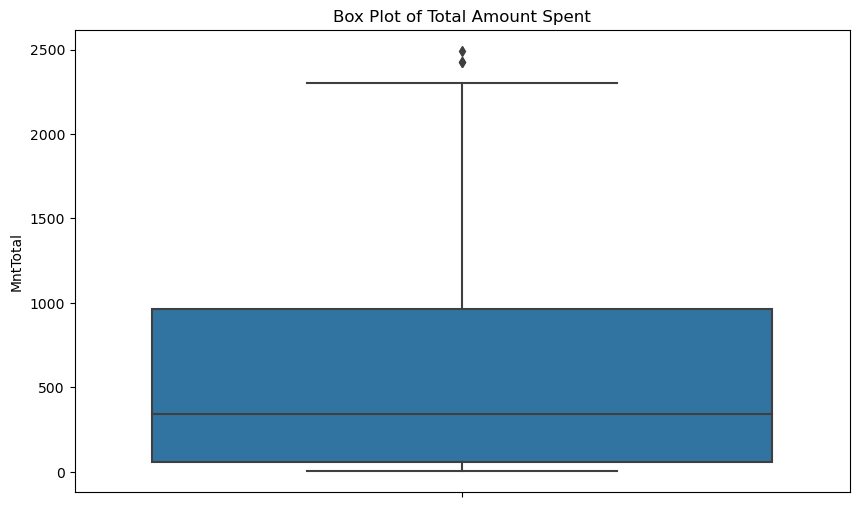

In [10]:
#Box plot for total amount spent
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,y='MntTotal')
plt.title('Box Plot of Total Amount Spent')
plt.ylabel('MntTotal')
plt.show()
     


In [11]:
#outlier detection for total amount spent

#calculate the quantities
Q1 = df['MntTotal'].quantile(0.25)
Q3 = df['MntTotal'].quantile(0.75)

#calculate the IQR
IQR = Q3 - Q1

#define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#identify the outliers
outliers = df[(df['MntTotal'] < lower_bound) | (df['MntTotal'] > upper_bound)]

#print the outliers
print(outliers.head())

     

       Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
1159  90638.0        0         0       29      1156        120   
1467  87679.0        0         0       62      1259        172   
1547  90638.0        0         0       29      1156        120   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
1159              915               94               144            96  ...   
1467              815               97               148            33  ...   
1547              915               94               144            96  ...   

      marital_Together  marital_Widow  education_2n Cycle  education_Basic  \
1159                 0              0                   0                0   
1467                 1              0                   0                0   
1547                 0              0                   0                0   

      education_Graduation  education_Master  education_PhD  MntTotal  \
1159                     0      

In [12]:
df=df[(df['MntTotal'] > lower_bound) | (df['MntTotal'] < upper_bound)]
df.describe()
     

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


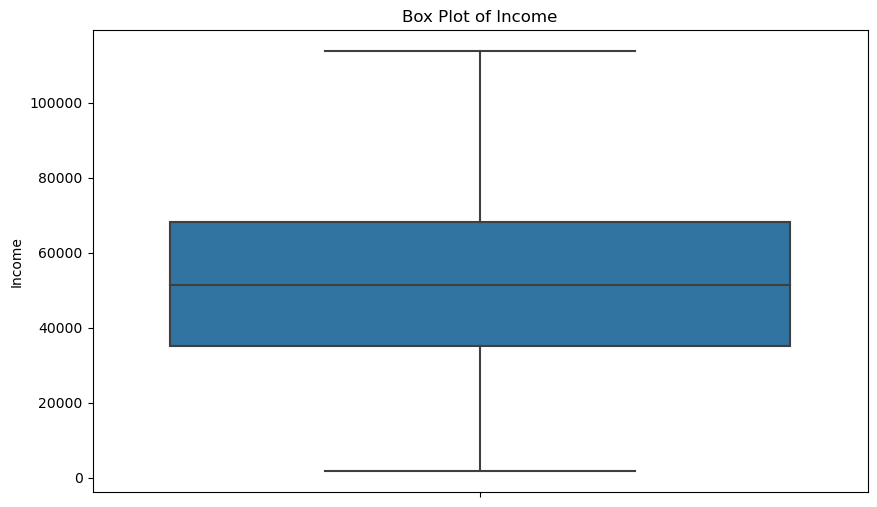

In [13]:
#income distribution box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,y='Income')
plt.title('Box Plot of Income')
plt.ylabel('Income')
plt.show()
     


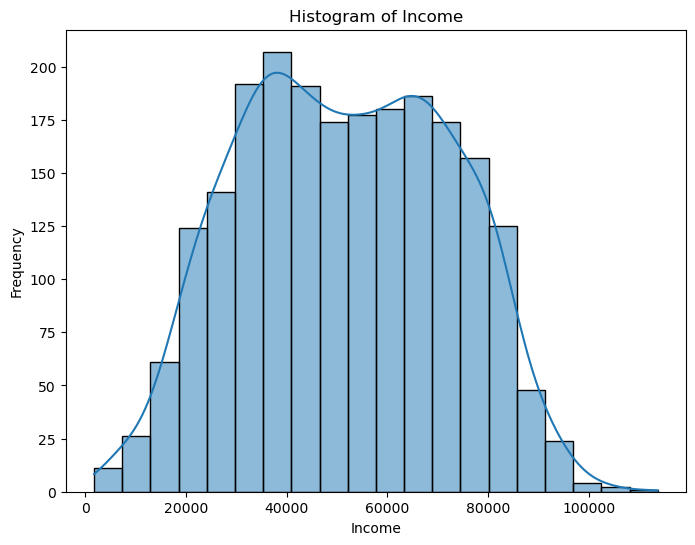

In [14]:
#income distribution histogram

plt.figure(figsize=(8, 6))
sns.histplot(data=df,x='Income',bins=20,kde=True)
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()
     

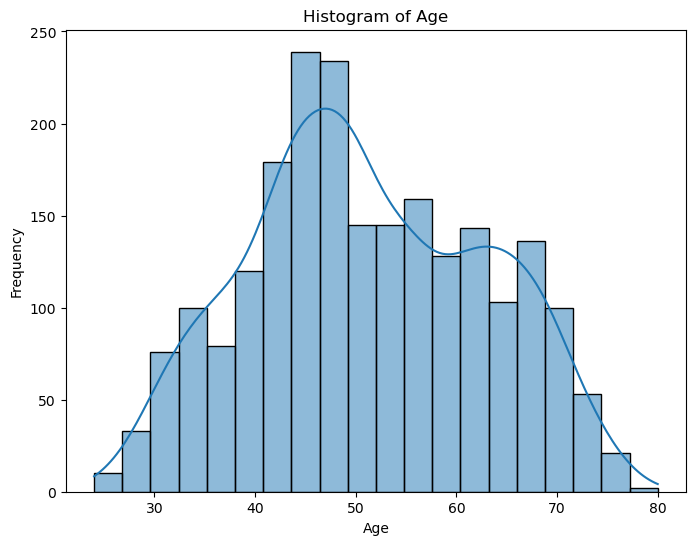

In [15]:
#age distribution histogram

plt.figure(figsize=(8, 6))
sns.histplot(data=df,x='Age',bins=20,kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
     

In [16]:
#categorize data columns

cols_demographics = ['Income','Age']
cols_children=['Kidhome','Teenhome']
cols_marital=['marital_Together','marital_Married','marital_Single','marital_Divorced','marital_Widow']
cols_mnt=['MntTotal','MntRegularProds','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
cols_communication=['Complain','Customer_days','Response']
cols_campaign=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmpOverall']
cols_purchase=['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
cols_education=['education_Graduation','education_PhD','education_Master','education_Basic','education_2n Cycle']
plt.show()


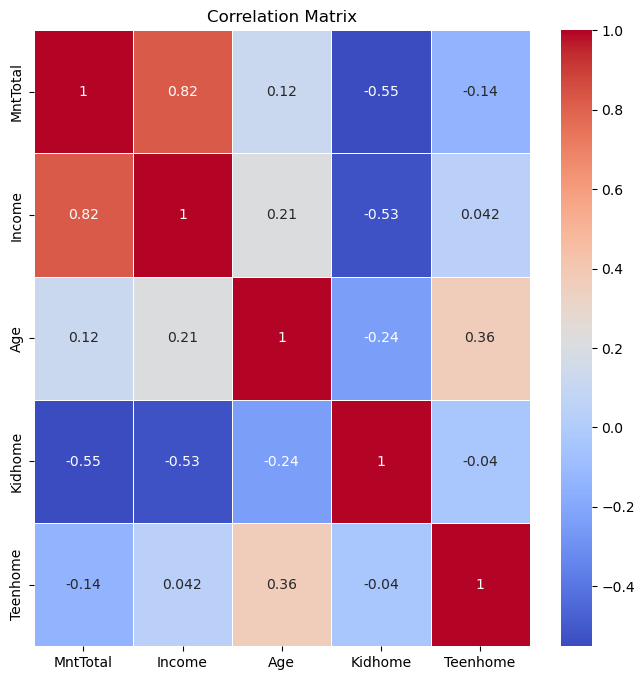

In [17]:
#correlation matrix

corr_matrix = df[['MntTotal']+cols_demographics+cols_children].corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [18]:
#Point-biserial correlation analysis for marital status

from scipy.stats import pointbiserialr
for col in cols_marital:
    correlation, p_value = pointbiserialr(df[col],df['MntTotal'])
    print(f'{correlation:.4f}:Point_Biserial_Correlation_for_{col} with p_value {p_value:.4f}')

     

0.0016:Point_Biserial_Correlation_for_marital_Together with p_value 0.9393
-0.0223:Point_Biserial_Correlation_for_marital_Married with p_value 0.2963
0.0059:Point_Biserial_Correlation_for_marital_Single with p_value 0.7804
0.0037:Point_Biserial_Correlation_for_marital_Divorced with p_value 0.8612
0.0359:Point_Biserial_Correlation_for_marital_Widow with p_value 0.0921


In [19]:
#for education

from scipy.stats import pointbiserialr
for col in cols_education:
    correlation, p_value = pointbiserialr(df[col],df['MntTotal'])
    print(f'{correlation:.4f}:Point_Biserial_Correlation_for_{col} with p_value {p_value:.4f}')
     

0.0143:Point_Biserial_Correlation_for_education_Graduation with p_value 0.5012
0.0708:Point_Biserial_Correlation_for_education_PhD with p_value 0.0009
0.0064:Point_Biserial_Correlation_for_education_Master with p_value 0.7653
-0.1386:Point_Biserial_Correlation_for_education_Basic with p_value 0.0000
-0.0603:Point_Biserial_Correlation_for_education_2n Cycle with p_value 0.0046


In [20]:
#marital status correlation

def get_marital_status(row):
    if row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'

df['Marital'] = df.apply(get_marital_status, axis=1)

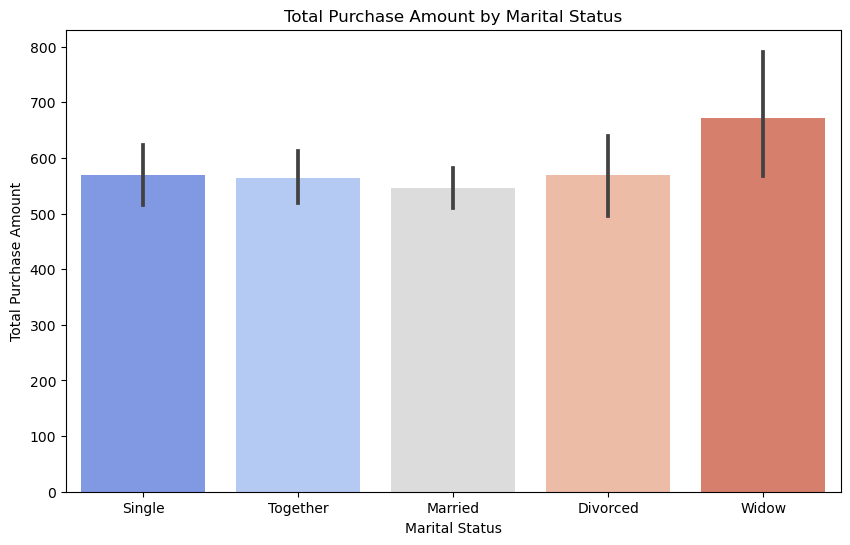

In [21]:
#Total purchase amount by marital status

plt.figure(figsize=(10, 6))
sns.barplot(data=df,x='Marital',y='MntTotal', palette='coolwarm')
plt.title('Total Purchase Amount by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Purchase Amount')
plt.show()

In [22]:
#creating a relationship indicator column

def get_relationship_indicator(row):
    if row['marital_Married'] == 1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0

df['Relationship_Indicator'] = df.apply(get_relationship_indicator, axis=1)
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,Relationship_Indicator
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,Single,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,Single,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,Together,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,Together,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,Married,1


In [23]:
#scaling feature for clustering with standardscaler

scaler=StandardScaler()
cols_for_clustering = ['Income','MntTotal','Relationship_Indicator']
df_scaled = df.copy()
df_scaled[cols_for_clustering] = scaler.fit_transform(df[cols_for_clustering])
df_scaled[cols_for_clustering].describe()
     

,Income,MntTotal,Relationship_Indicator
count,2.205000e+03,2.205000e+03,2.205000e+03
mean,2.255691e-17,-3.705778e-17,6.444832e-17
std,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.409272e+00,-9.704038e-01,-1.347625e+00
25%,-7.932106e-01,-8.800957e-01,-1.347625e+00
50%,-1.618161e-02,-3.816642e-01,7.420464e-01
75%,8.044529e-01,6.968235e-01,7.420464e-01
max,2.999363e+00,3.348757e+00,7.420464e-01


In [24]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(df_scaled[cols_for_clustering])
df_scaled['pc1'] = pca_res[:,0]
df_scaled['pc2'] = pca_res[:,1]
     


In [25]:
#resolving namespace conflict for KMeans

if 'KMeans' in globals():
    del globals()['KMeans']

Error occured while processing K=2: name 'KMeans' is not defined
Error occured while processing K=3: name 'KMeans' is not defined
Error occured while processing K=4: name 'KMeans' is not defined
Error occured while processing K=5: name 'KMeans' is not defined
Error occured while processing K=6: name 'KMeans' is not defined
Error occured while processing K=7: name 'KMeans' is not defined
Error occured while processing K=8: name 'KMeans' is not defined
Error occured while processing K=9: name 'KMeans' is not defined


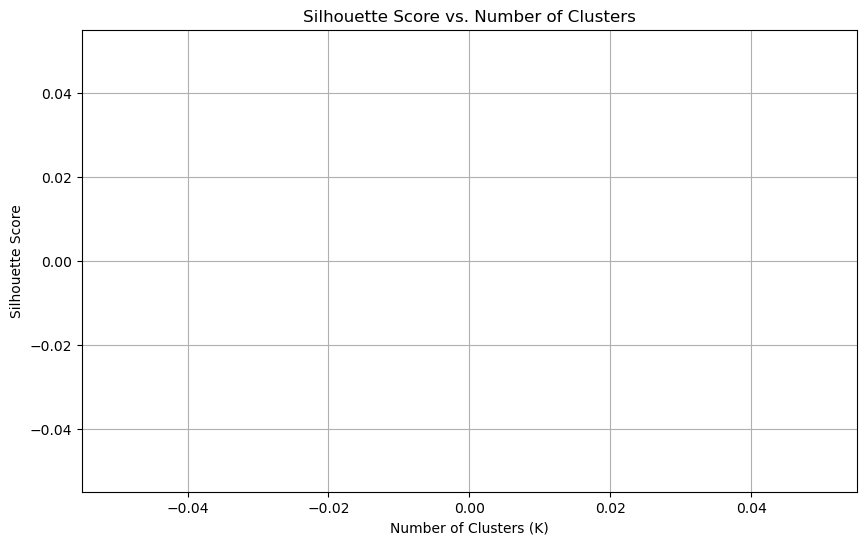

In [26]:
#evaluating optimal clustering

x=np.random.rand(100, 2)

K_range=range(2,10)

silhouette_list=[]

for K in K_range:
  try:
    model = KMeans(n_clusters=K, random_state=7)
    clusters = model.fit_predict(x)
    s_avg = silhouette_score(x, clusters)
    silhouette_list.append(s_avg)
  except Exception as e:
    print(f"Error occured while processing K={K}: {e}")
    silhouette_list.append(None)

#plot
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_list, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

In [27]:
#pca transformation

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

if KMeans in globals():
    del globals()['KMeans']

np.random.seed(0)
data=pd.DataFrame(np.random.randn(100,4),columns=['Feature1','Feature2','Feature3','Feature4'])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components=2)
pca_res = pca.fit_transform(data_scaled)
     


In [28]:
from sklearn.cluster import KMeans
data = pd.DataFrame({
    'Feature1': [10,20,30,40,50,60,70,80],
    'Feature2': [20,30,40,50,60,70,80,90],
    'Feature3': [15,25,35,45,55,65,75,85],

})

cols_for_clustering = ['Feature1','Feature2','Feature3']
cols_mnt= ['Feature2','Feature3']

scaler= StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data[cols_for_clustering]),columns=cols_for_clustering)

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

mnt_data= data.groupby('Cluster')[cols_mnt].mean().reset_index()

print(mnt_data.head())
     

   Cluster  Feature2  Feature3
0        0      80.0      75.0
1        1      30.0      25.0
2        2      55.0      50.0


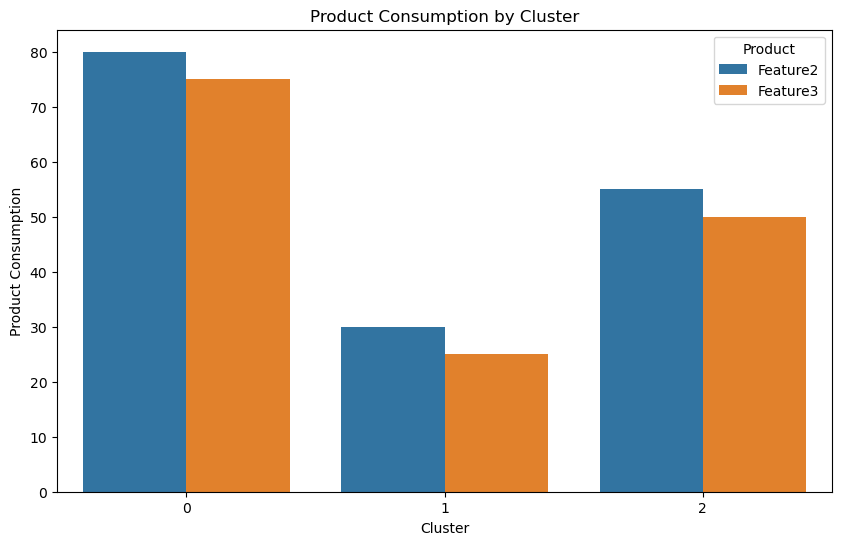

In [29]:
#visualizing product consumption by cluster

melted_data = pd.melt(mnt_data, id_vars=['Cluster'], var_name='Product', value_name='Consumption')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='Cluster', y='Consumption', hue='Product')
plt.title('Product Consumption by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Product Consumption')
plt.legend(title='Product', loc='upper right')
plt.show()
     


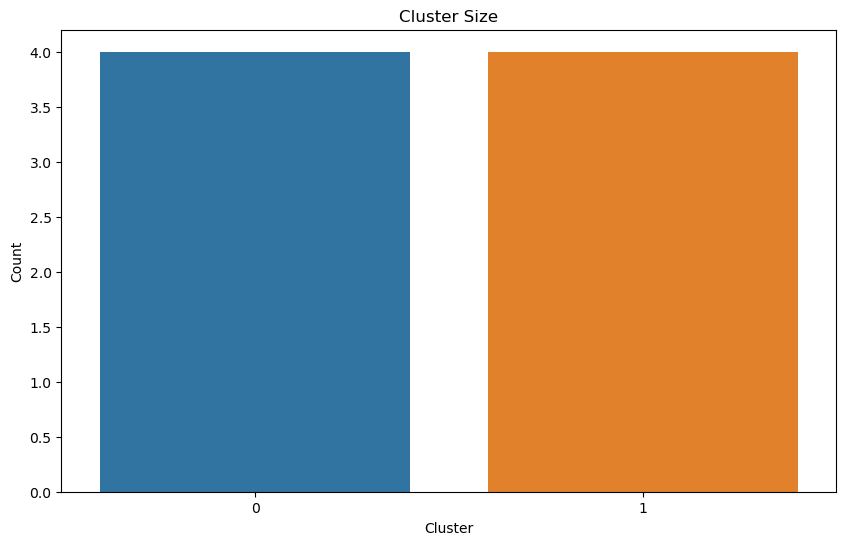

In [30]:
data= pd.DataFrame({
    'MntTotal':[100,150,200,250,300,350,400,450],
    'Cluster':[0,1,0,1,0,1,0,1]
})

cluster_sizes= data.groupby('Cluster')[['MntTotal']].count().reset_index()
cluster_sizes.rename(columns={'MntTotal':'Count'},inplace=True)
cluster_sizes

plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_sizes, x='Cluster', y='Count')
plt.title('Cluster Size')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()
     

In [31]:
cluster_sizes= data.groupby('Cluster')[['MntTotal']].count().reset_index()
cluster_sizes.rename(columns={'MntTotal':'Count'},inplace=True)

total_rows= len(data)

cluster_sizes['Percentage'] = (cluster_sizes['Count'] / total_rows) * 100
     

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

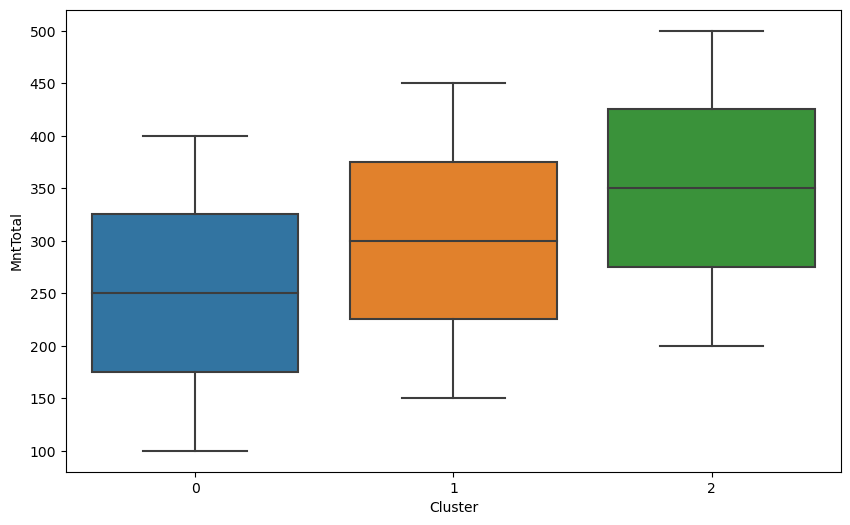

In [32]:
#Box plot of total amount by cluster
data={
    'Cluster':[0,1,2,0,1,2,0,1,2],
    "MntTotal":[100,150,200,250,300,350,400,450,500]
}
df=pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df,x='Cluster',y='MntTotal')
plt

In [33]:
data=pd.DataFrame(data)
print(data.columns)


if 'MntTotal' not in data.columns:
  raise ValueError("Column 'MntTotal' not found in the DataFrame.")

Index(['Cluster', 'MntTotal'], dtype='object')


Text(0, 0.5, 'Income')

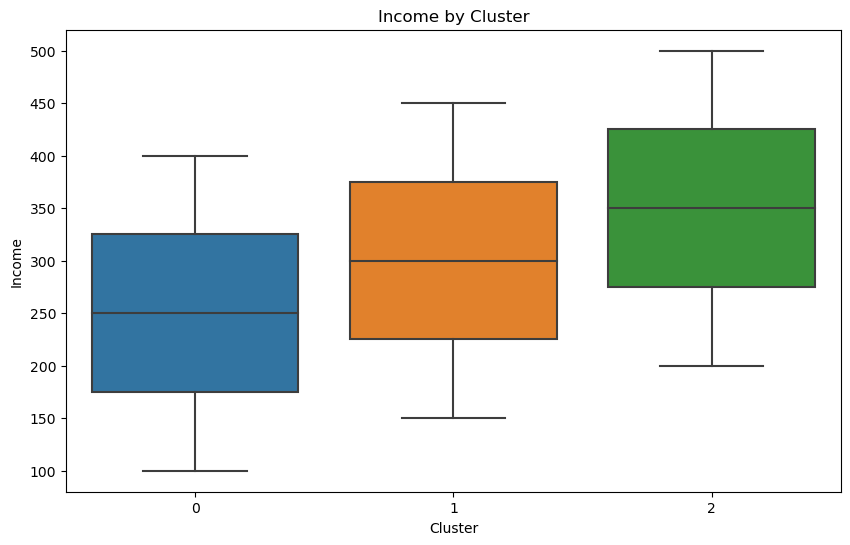

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data,x='Cluster',y='MntTotal')
plt.title('Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
     